# 파이프라인

# 1. 와인 데이터셋 불러오기

In [2]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])

X = wine.drop(['color'], axis=1)
y = wine['color']

# 2. 파이프라인 만들기

![nn](img/pipeline.png)

### scaler와 clf를 미리 지정해서 pipeline을 지정

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
             ('clf', DecisionTreeClassifier())]

pipe = Pipeline(estimators)

### 파이프라인의 단계 확인

In [7]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

### set_params

In [9]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

# 3. 파이프라인 이용한 모델학습

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13, stratify=y)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

# 4. 파이프라인 이용한 예측 결과 정확도 확인

In [11]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train acc: ', accuracy_score(y_train, y_pred_tr))
print('Test acc: ', accuracy_score(y_test, y_pred_test))

Train acc:  0.9657494708485664
Test acc:  0.9576923076923077


# 5. 모델구조 확인

In [15]:
pipe.steps

[('scaler', StandardScaler()),
 ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))]

In [16]:
pipe['clf']

DecisionTreeClassifier(max_depth=2, random_state=13)

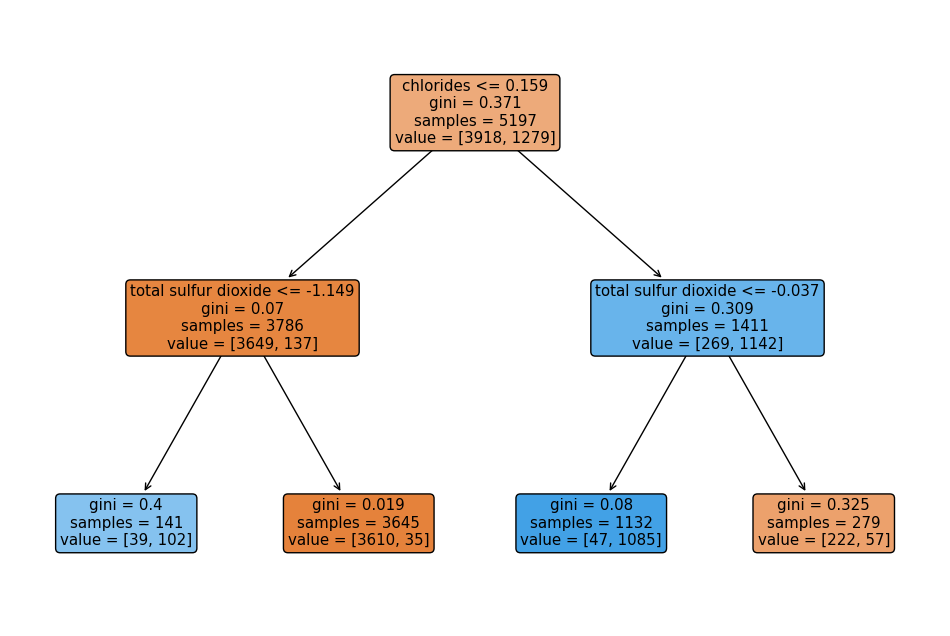

In [18]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12, 8))
tree.plot_tree(pipe['clf'], feature_names=X.columns.tolist(),
               rounded=True,
               filled=True)
plt.show()